<a href="https://colab.research.google.com/github/Mohammed-Rwelly/Bengaluru-House-price-prediction/blob/main/Bengaluru_House_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Common step is to load all required libraries** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

**import dataset from google drive to google colab**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/kaggle'
data=pd.read_csv(path+'/Bengaluru_House_Data.csv')

Mounted at /content/drive


**Now perform Exploratory Data Analysis and dispaly the top 5 rows in data set using the head() method**

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Check the shape of data set using shape method,it displays the number of rows and number of columns**

In [ ]:
data.shape

(13320, 9)

**What is the names of locations of the location column?**



In [ ]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

**Hon many location are there in the location column ?**

In [ ]:
data['location'].nunique()

1305

**What is the names of area types in the area_type column?**

In [ ]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

**Visualise the number of times a type area is repeated using matplotlib**

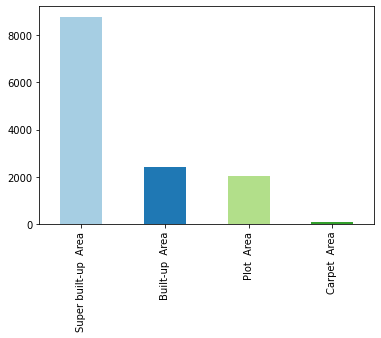

In [ ]:

col_map = plt.get_cmap('Paired')
data['area_type'].value_counts().plot.bar(color=col_map.colors)

**Drop the features (columns) which no use to train our model ,the features which we are going to drop are are_type,balcony,siciety,availability**

In [ ]:

data1=data.drop(['area_type','society','balcony','availability'],axis='columns')

**Then again check if there are  Null values ,So you can see there are some null values**



In [ ]:

data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**Now we drop all rows which contain null values using the method dropna()**

In [ ]:
house_data=data1.dropna()

**Then again if there are Null values or not , as you can see below there are not null values**

In [ ]:
house_data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

**Check the shape of the data set** 

In [ ]:
house_data.shape

(13246, 5)

**Now check the  unique values in size feature ,you can see there are different types of value Bhk,bedrooms,etc.**

In [ ]:

house_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**We write a function to extract the starting interger values from the size feature and store it into a BHK feature and drop size featue which of no use in our model**

In [ ]:
house_data['BHK']=house_data['size'].apply(lambda x:x.split(' ')[0])
house_data=house_data.drop(['size'],axis='columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Check the BHK column 

In [ ]:
house_data['BHK']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: BHK, Length: 13246, dtype: object

Change possition column price to the lase 

In [ ]:
new_column=['location', 'total_sqft', 'bath', 'BHK','price']
house_data=house_data[new_column]
house_data.head()

,location,total_sqft,bath,BHK,price
0,Electronic City Phase II,1056,2.0,2,39.07
1,Chikka Tirupathi,2600,5.0,4,120.00
2,Uttarahalli,1440,2.0,3,62.00
3,Lingadheeranahalli,1521,3.0,3,95.00
4,Kothanur,1200,2.0,2,51.00


**Dispaly the top 50 rows of the total_sqft feature**

In [ ]:
house_data['total_sqft'].head(50)

0            1056
1            2600
2            1440
3            1521
4            1200
5            1170
6            2732
7            3300
8            1310
9            1020
10           1800
11           2785
12           1000
13           1100
14           2250
15           1175
16           1180
17           1540
18           2770
19           1100
20            600
21           1755
22           2800
23           1767
24            510
25           1250
26            660
27           1610
28           1151
29           1025
30    2100 - 2850
31           1075
32           1760
33           1693
34           1925
35            700
36           1070
37           1724
38           1290
39           1143
40           1296
41           1254
42            600
43            660
44        1330.74
45            600
46            970
47           1459
48            800
49            869
Name: total_sqft, dtype: object

**Check the unique values of total_sqft feature which contain integer values like (2600)  and range  values like (1133 - 1384)**

In [ ]:
house_data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**We write a function is_float() with total_sqft as an argument and return all the floating (function  convert integer values to float)**

In [ ]:
def is_float(df):
  try:
    float(df)
  except:
    return False
  return True

**We apply a function on total_sqft feature but we use tile ~ Symbol which return all values except floating type**

In [ ]:
house_data[~house_data['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,BHK,price
30,Yelahanka,2100 - 2850,4.0,4,186.000
122,Hebbal,3067 - 8156,4.0,4,477.000
137,8th Phase JP Nagar,1042 - 1105,2.0,2,54.005
165,Sarjapur,1145 - 1340,2.0,2,43.490
188,KR Puram,1015 - 1540,2.0,2,56.800
410,Kengeri,34.46Sq. Meter,1.0,1,18.500
549,Hennur Road,1195 - 1440,2.0,2,63.770
648,Arekere,4125Perch,9.0,9,265.000
661,Yelahanka,1120 - 1145,2.0,2,48.130
672,Bettahalsoor,3090 - 5002,4.0,4,445.000


**Above shows that 'total_sqft' can be a range (e.g 2100 - 2850 ) for just case we will try to convet it into a single value by we take average of min and max value in the range .ٍSo There are so few a nother cases such as (30Acres, 1100Sq.Yards,  34.46Sq. Meter ,etc.) we ara going to drop it by return None ,because this type of the value is onle one in total_sqft**



In [ ]:
def convert_sqft(val):
  tokens=val.split('-')
  if len(tokens)==2 :
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(val)
  except:
    return None
house_data['total_sqft']=house_data['total_sqft'].apply(convert_sqft)

**for a below row, it shows total_sqft as 2475.0 which is an average of range 2100-2850**

In [ ]:
house_data['total_sqft'].loc[30]

2475.0

**Check if all values of total_sqft feature is floating and as we can see below the data type of total_sqft is float64 ,so all all values of total_sqft feature is floating**

In [ ]:
house_data['total_sqft'].dtypes

dtype('float64')

**Then creat  a new column to find the pricr per square foot from the existing feature price and total_sqft**

In [ ]:

house_data['Price_per_sqft']=round(house_data['price']*100000/house_data['total_sqft'],2)

In [ ]:
house_data['Price_per_sqft']

0         3699.81
1         4615.38
2         4305.56
3         6245.89
4         4250.00
           ...   
13315     6689.83
13316    11111.11
13317     5258.55
13318    10407.34
13319     3090.91
Name: Price_per_sqft, Length: 13246, dtype: float64

**how many value counts of the location feature ?**

In [ ]:
 len(house_data.groupby('location')['location'].agg('count'))

1304

**Value counts of locations after I remove spaces at the start and end of a name of location**

In [ ]:
house_data['location']=house_data['location'].apply(lambda x:x.strip())
len(house_data.groupby('location')['location'].agg('count'))


1293

**value counts of location after make all leters is lowercase and removing the spasec**

In [ ]:
house_data['location']=house_data['location'].apply(lambda x:x.lower())
len(house_data.groupby('location')['location'].agg('count'))

1282

**Visulaization the number of times the top 12 location are repeated using matplotlib**

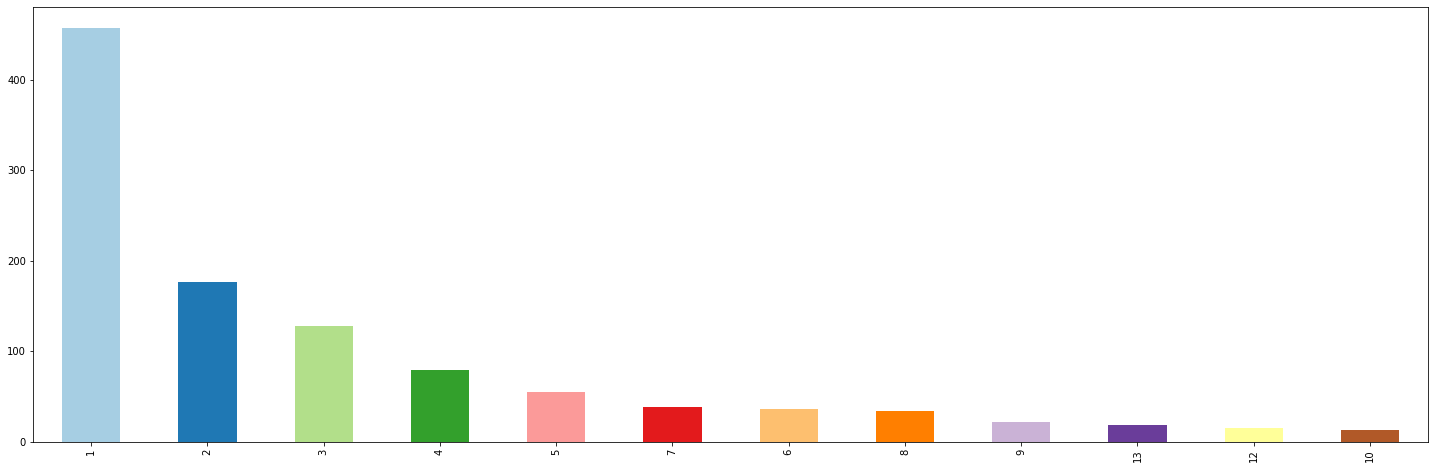

In [ ]:
locations=house_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
plt.figure(figsize=(25, 8))
col_map = plt.get_cmap('Paired')
locations.value_counts().head(12).plot.bar(color=col_map.colors)

**Display the top 30 rows of location feature which 1 - 457 it means there are 457 repeated locations only once,2  177 it means there are 117 repeated locations only twice**

In [ ]:
pd.set_option('display.max_rows', None)
locations.value_counts()

1      457
2      177
3      128
4       79
5       55
7       39
6       37
8       34
9       22
13      19
12      16
10      13
16      13
17      12
11      11
14       9
24       7
22       7
25       6
36       5
27       5
26       5
43       5
42       5
19       5
20       5
15       5
29       4
30       4
52       4
40       3
21       3
23       3
18       3
39       3
33       3
28       3
34       2
49       2
47       2
48       2
70       2
31       2
51       2
57       2
62       2
72       2
73       2
74       2
79       2
88       2
38       2
32       1
37       1
535      1
41       1
171      1
106      1
131      1
141      1
149      1
150      1
152      1
175      1
96       1
176      1
186      1
210      1
236      1
266      1
304      1
98       1
87       1
44       1
60       1
45       1
392      1
50       1
53       1
54       1
58       1
63       1
85       1
64       1
66       1
67       1
68       1
81       1
84       1
46       1
Name: loca

Let's check the location is 1 or 10 times 
   List item



In [ ]:
locations_less_than_10=locations[locations<=10]
locations_less_than_10

location
nagappa reddy layout                                  10
sadashiva nagar                                       10
dodsworth layout                                      10
1st block koramangala                                 10
basapura                                              10
sector 1 hsr layout                                   10
dairy circle                                          10
naganathapura                                         10
ganga nagar                                           10
gunjur palya                                          10
nagadevanahalli                                       10
btm 1st stage                                         10
kalkere                                               10
yemlur                                                 9
kamakshipalya                                          9
kaverappa layout                                       9
volagerekallahalli                                     9
peenya                

**Then create an anonymous function which applies to the location .This function returns all locations where the count of location is greater than 10 and, if the value of location is less than or equal 10 return 'other'**

In [ ]:
house_data['location']=house_data['location'].apply(lambda x: "Other" if x in locations_less_than_10 else x )

**Now the unique location become 242 rather than 1282**

In [ ]:
house_data['location'].nunique()

242

In [ ]:

house_data['location'].tail()

13315               whitefield
13316                    Other
13317    raja rajeshwari nagar
13318          padmanabhanagar
13319             doddathoguru
Name: location, dtype: object

In [ ]:
house_data['BHK']=pd.to_numeric(house_data['BHK'])
house_data[house_data['total_sqft']/house_data['BHK']>300].head()
house_price=house_data[~(house_data['total_sqft']/house_data['BHK']<300)]
len(house_price)


12502

In [ ]:
house_price['BHK'].value_counts()

2     5486
3     4739
4     1242
1      644
5      204
6       92
7       42
8       26
9       17
10       6
11       2
16       1
13       1
Name: BHK, dtype: int64

In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced_df = subdf[((subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st)))]
    df_out = pd.concat([df_out, reduced_df],ignore_index=True)
  return df_out 
house = remove_pps_outliers(house_price)   

In [ ]:
 house.shape

(10241, 6)

In [ ]:
house.describe()

,total_sqft,bath,BHK,price,Price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,2.572210,90.982730,5657.702574
std,876.716232,0.981338,0.896219,86.147549,2266.477027
min,300.000000,1.000000,1.000000,10.000000,1250.000000
25%,1108.000000,2.000000,2.000000,49.000000,4244.760000
50%,1282.000000,2.000000,2.000000,67.000000,5172.410000
75%,1650.000000,3.000000,3.000000,100.000000,6426.100000
max,30400.000000,16.000000,16.000000,2200.000000,24509.800000


**Now visuliaze the 'rajaji nagar 'location with 2 BHK and 3BHK ,where 2bhk is the blue color and 3 bhk is the red color .So you can see in the below graph that the 2 bhk house price is less than 3 bhk house price**



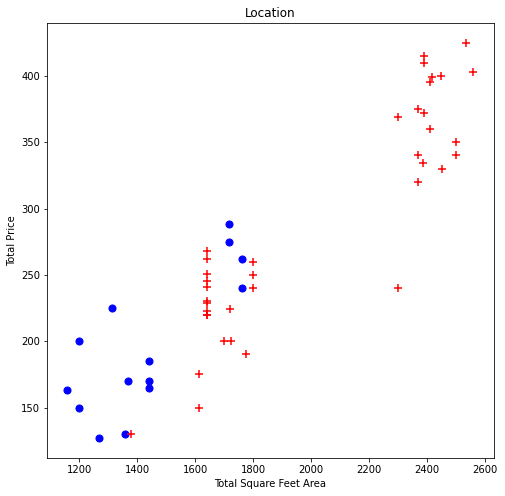

In [ ]:
def plot_scatter_chart(df,location):
  bhk2=df[(df.location == location) & (df.BHK == 2)]
  bhk3=df[(df.location == location) & (df.BHK ==3)]
  plt.rcParams["figure.figsize"]=(8,8)
  plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK',s =50)
  plt.scatter(bhk3.total_sqft, bhk3.price, color='red', marker='+',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Total Price")
  plt.title("Location")
  plt.show()
plot_scatter_chart(house,"rajaji nagar")

**Now visualize 'whitefield' location with 2 BHK and 3 BHK ,where 2 bhk is blue color and 3bhk is red color.So you can see in the below graph the 3 bhk house price is les than the 2 bhk house price**

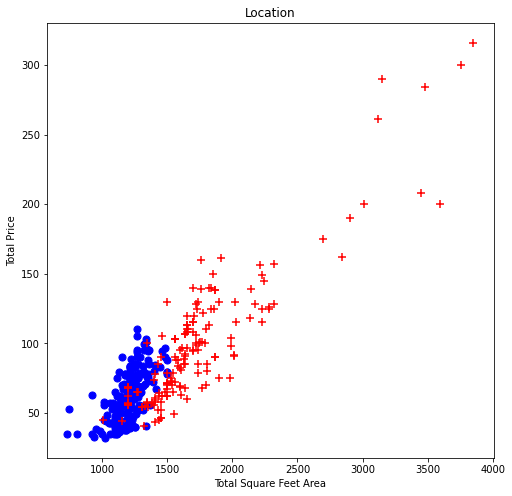

In [ ]:
plot_scatter_chart(house,"whitefield")

In [ ]:
house.shape

(10241, 6)

**Now a gain we apply Standard Deviation teqneque to remove the outlier from the price_per_sqft**

In [ ]:
def remove_bhk_outlier(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    state_bhk={}
    for bhk,bhk_df in location_df.groupby('BHK'):
      state_bhk[bhk]={"mean":np.mean(location_df.Price_per_sqft),
                      "std":np.std(location_df.Price_per_sqft),
                      "count":bhk_df.shape[0]}
      for bhk,bhk_df in location_df.groupby('BHK'):
        state=state_bhk.get(bhk-1)
        if state and state["count"] > 5:
          exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<state["mean"]].index.values)
  return df.drop(exclude_indices,axis='index')

**Now after apply remove_bhk_outlier function  become the size of the data set is 6942 rows rather than 10241**

In [ ]:
house_with_outlier=remove_bhk_outlier(house)
house_with_outlier.shape

(6942, 6)

**Visalize the 'rajaji nagar' location where 2 bhk is blue color and the 3 bhk is red color ,So as we can see below the 3 BHK house price is greater the the 2 BHK house price**

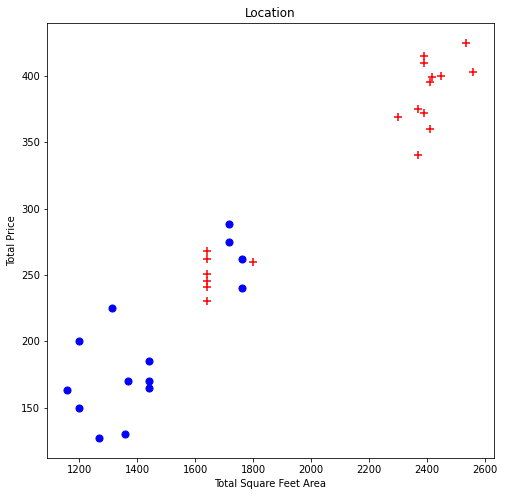

In [ ]:
plot_scatter_chart(house_with_outlier,"rajaji nagar")

**Visalize the 'electroniccityphaseii' location where 2 bhk is blue color and the 3 bhk is red color ,So as we can see below the 3 BHK house price is greater than the 2 BHK house price**

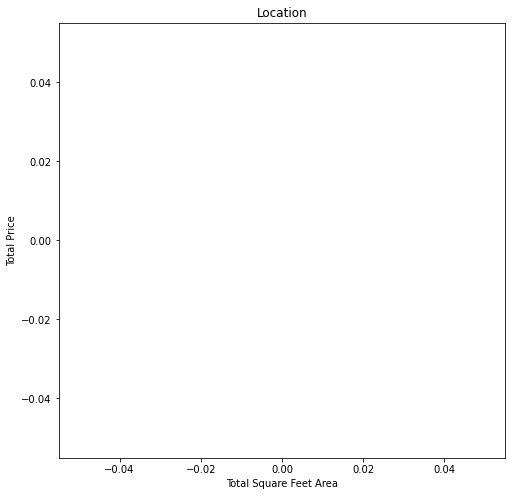

In [ ]:
plot_scatter_chart(house_with_outlier,"electroniccityphaseii")

**Now check the unique values of the bath , a we can see in below one house has 16 bath which  makes no sense** 

In [ ]:
house_with_outlier['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  9., 12.,  6., 16.,  7., 13.])

**For a below graph the count of bath with 7 more than is so few**

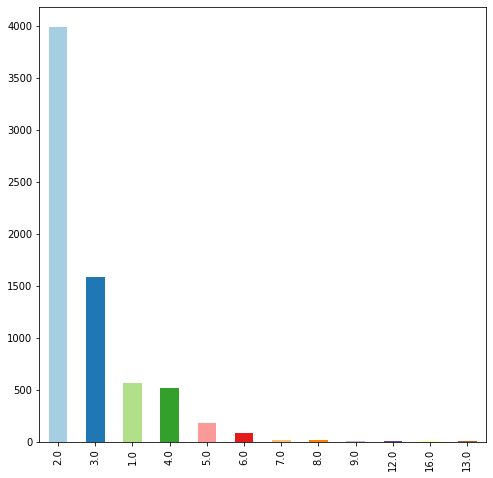

In [ ]:
col_map = plt.get_cmap('Paired')
house_with_outlier.bath.value_counts().plot.bar(color=col_map.colors)

**We are going to display the houses that have more than 7 baths,So for example if you have 4 dedrooms home and even if you have bathroom in all 4 bedrooms plus one guest bathroom then you will have total bath = total bed +1 max.Anything above that is an outlier or an error data and you can removed**

In [ ]:
house_with_outlier[house_with_outlier.bath >7]

,location,total_sqft,bath,BHK,price,Price_per_sqft
36,2nd stage nagarbhavi,3000.0,8.0,6,451.0,15033.33
37,2nd stage nagarbhavi,2400.0,8.0,6,450.0,18750.00
318,Other,2600.0,8.0,8,180.0,6923.08
357,Other,5000.0,9.0,11,360.0,7200.00
742,Other,11338.0,9.0,6,1000.0,8819.90
817,Other,12000.0,12.0,10,525.0,4375.00
906,Other,10000.0,16.0,16,550.0,5500.00
1092,Other,4500.0,9.0,9,500.0,11111.11
1639,Other,6000.0,12.0,11,150.0,2500.00
1940,Other,3300.0,9.0,10,450.0,13636.36


In [ ]:
house_without_outlierbath=house_with_outlier[house_with_outlier.bath<=house_with_outlier.BHK+1]

In [ ]:
house_without_outlierbath[house_without_outlierbath.bath>7]

,location,total_sqft,bath,BHK,price,Price_per_sqft
318,Other,2600.0,8.0,8,180.0,6923.08
357,Other,5000.0,9.0,11,360.0,7200.00
906,Other,10000.0,16.0,16,550.0,5500.00
1092,Other,4500.0,9.0,9,500.0,11111.11
1639,Other,6000.0,12.0,11,150.0,2500.00
1940,Other,3300.0,9.0,10,450.0,13636.36
1970,Other,5425.0,13.0,13,275.0,5069.12
2234,Other,3300.0,8.0,8,310.0,9393.94
2586,abbigere,3000.0,8.0,8,150.0,5000.00
3560,bommanahalli,3000.0,8.0,8,140.0,4666.67


In [ ]:
house_without_outlierbath.location.value_counts()

Other                          904
whitefield                     250
electronic city                156
sarjapur  road                 138
raja rajeshwari nagar          133
uttarahalli                    120
haralur road                   118
marathahalli                   113
kanakpura road                 105
bannerghatta road              102
thanisandra                     99
hennur road                     98
electronic city phase ii        92
hebbal                          89
yelahanka                       87
7th phase jp nagar              85
bellandur                       72
kr puram                        63
harlur                          58
sarjapur                        58
kasavanhalli                    49
hormavu                         49
begur road                      49
banashankari                    48
kothanur                        44
chandapura                      43
rajaji nagar                    43
hennur                          42
ramamurthy nagar    

In [ ]:
house_withoutoutput=house_without_outlierbath.drop(['Price_per_sqft'],axis='columns')
house_withoutoutput

,location,total_sqft,bath,BHK,price
0,1st block jayanagar,2850.000,4.0,4,428.000
1,1st block jayanagar,1630.000,3.0,3,194.000
2,1st block jayanagar,1875.000,2.0,3,235.000
3,1st block jayanagar,1200.000,2.0,3,130.000
4,1st block jayanagar,1235.000,2.0,2,148.000
5,1st block jayanagar,2750.000,4.0,4,413.000
6,1st block jayanagar,2450.000,4.0,4,368.000
7,1st phase jp nagar,2825.000,4.0,4,250.000
8,1st phase jp nagar,1875.000,3.0,3,167.000
9,1st phase jp nagar,1500.000,5.0,5,85.000


In [ ]:
house_encode_location=pd.get_dummies(house_withoutoutput.location)


In [ ]:
house_encode_location.head(5)

,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
house_final=pd.concat([house_withoutoutput,house_encode_location.drop(['Other'],axis='columns')],axis='columns')

In [ ]:
house_final.head(10)

,location,total_sqft,bath,BHK,price,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,2850.0,4.0,4,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,1630.0,3.0,3,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st block jayanagar,1875.0,2.0,3,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st block jayanagar,1200.0,2.0,3,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st block jayanagar,1235.0,2.0,2,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st block jayanagar,2750.0,4.0,4,413.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st block jayanagar,2450.0,4.0,4,368.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st phase jp nagar,2825.0,4.0,4,250.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st phase jp nagar,1875.0,3.0,3,167.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st phase jp nagar,1500.0,5.0,5,85.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
house_final=pd.concat([house_withoutoutput,house_encode_location.drop(['Other'],axis='columns')],axis='columns')

In [ ]:
house_final.shape

(6869, 246)

In [ ]:
house_final.head(10)

,location,total_sqft,bath,BHK,price,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,2850.0,4.0,4,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,1630.0,3.0,3,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st block jayanagar,1875.0,2.0,3,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st block jayanagar,1200.0,2.0,3,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st block jayanagar,1235.0,2.0,2,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st block jayanagar,2750.0,4.0,4,413.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st block jayanagar,2450.0,4.0,4,368.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st phase jp nagar,2825.0,4.0,4,250.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st phase jp nagar,1875.0,3.0,3,167.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st phase jp nagar,1500.0,5.0,5,85.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
house_for_model=house_final.drop('location',axis='columns')

In [ ]:
house_for_model.shape

(6869, 245)

Model Building

In [ ]:
y=house_for_model['price']
x=house_for_model.drop('price',axis='columns')

In [ ]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st block jayanagar',
       '1st phase jp nagar', '2nd phase judicial layout',
       '2nd stage nagarbhavi', '5th block hbr layout', '5th phase jp nagar',
       '6th phase jp nagar',
       ...
       'vijayanagar', 'vishveshwarya layout', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yelenahalli', 'yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
clf_r=LinearRegression()
clf_r.fit(x_train,y_train)
clf_r.score(x_test,y_test)

0.8233868418075695

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x, y)
xgb_reg.score(x, y)

[07:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8831456875730495

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores=cross_val_score(LinearRegression(),x,y,cv=cv)
print(scores.mean())

NameError: ignored

**Based on abelow result we can say the LinearRegression gives the best score**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'xgbregressor' :{
            'model': XGBRegressor(),
            'params' : {'learning_rate': [0.05, 0.07], #so called `eta` value, 
                       'min_child_weight': [3,5],
                       'max_depth': [6, 8],
                       'gamma':[0.001,0.2],
                       'subsample': [0.7], 
                       'colsample_bytree': [0.7,1],
                       'objective':['reg:linear'],
 
                       'n_estimators': [100,300,500]}
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

[12:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,model,best_score,best_params
0,linear_regression,0.843450,{'normalize': False}
1,lasso,0.704624,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.699878,"{'criterion': 'mse', 'splitter': 'best'}"
3,xgbregressor,0.784142,"{'colsample_bytree': 0.7, 'gamma': 0.001, 'lea..."


,model,best_score,best_params
0,linear_regression,0.843450,{'normalize': False}
1,lasso,0.704624,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.699878,"{'criterion': 'mse', 'splitter': 'best'}"
3,xgbregressor,0.784142,"{'colsample_bytree': 0.7, 'gamma': 0.001, 'lea..."


**Test the Model for few properties**

In [ ]:
def predict_house(location,bhk,bath,sqft):
  index_location=np.where(x.columns == location)[0][0]
  x=np.array(len(x.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  #if area is exsist
  if index_location>=0:
    x[index_location]=1
    return clf_r.predict([x])[0]


In [ ]:
predict_price(‘1st Phase JP Nagar’,1000,3,2)

In [ ]:
predict_price(‘1st Phase JP Nagar’,10000, 3, 3)

In [ ]:
predict_price(‘Indira Nagar’,10000, 3, 3)

Based on above result we can say that LinearRegression gives the best score